In [10]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pandas as pd
sns.set(style = 'darkgrid')

In [6]:
phases = ct.import_phases('KOH.cti', ['K_solid', 'K_liquid', 'KOH_a', 'KOH_b',
                                      'KOH_liquid', 'K2O2_solid', 'K2O_solid',
                                      'KO2_solid', 'ice', 'liquid_water',
                                      'KOH_plasma'])

# create the Mixture object from the list of phases
mix = ct.Mixture(phases)

def hydrogenDis(minTemp, maxTemp, step, pressure):
    fileName = '{} Pa.csv'.format(pressure)
    x = np.arange(minTemp, maxTemp+1, step) #Creates row vector of input temperatures
    y = []  
    z = []
    a = []
    #csvfile = open(fileName, 'w')
    #writer = csv.writer(csvfile)
    #writer.writerow(['T'] + mix.species_names)
    for i in range(len(x)):               #For each temperature input
        mix.T = x[i]
        mix.P = pressure
        mix.species_moles = "K: 0.00000000000000000000000001, H2: 1, O2: 0.0000000000000000000000000001"
        mix.equilibrate("TP", max_steps=100000, log_level=0)  #create a gas mixture with given temperature, constant              #pressure of 1 atm and initial mole fraction of H2 = 1,
        total = np.sum([mix.species_moles[11], mix.species_moles[12], mix.species_moles[12], mix.species_moles[15]])
        y.append(mix.species_moles[11]/total)         #then equilibrate mixture and append equilibrated mole fraction 
        z.append(mix.species_moles[12]/total)  
        a.append(mix.species_moles[15]/total)         #of H to array y
        #writer.writerow([x[i]] + list(mix.species_moles))
    
    sns.lineplot(x,y, label = 'H').set_title('Hyrdogen Dissociation vs Temperature at {} Pa'.format(pressure))
    sns.lineplot(x,z, label = 'H+')
    sns.lineplot(x,a, label = 'H2')
    

In [17]:
data_1 = pd.read_csv('data/H2data(1bar).csv')
temp1 = data_1['T, K'].tolist()
H1 = data_1['H'].tolist()
Hplus1 = data_1['H+'].tolist()
H21 = data_1['H2'].tolist()

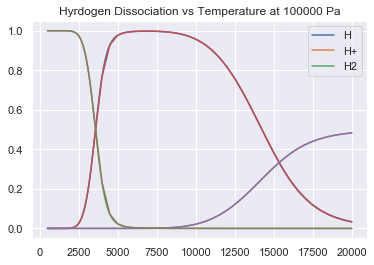

In [22]:
hydrogenDis(500, 20000, 100, 100000)
sns.lineplot(temp1, H1)
sns.lineplot(temp1, Hplus1)
sns.lineplot(temp1, H21)

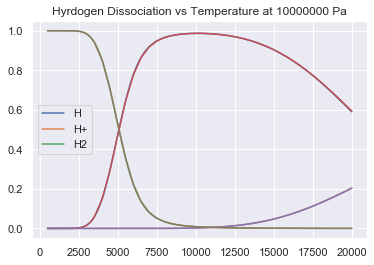

In [23]:
data_2 = pd.read_csv('data/H2data(100bar).csv')
temp2 = data_2['T, K'].tolist()
H2 = data_2['H'].tolist()
Hplus2 = data_2['H+'].tolist()
H22 = data_2['H2'].tolist()
hydrogenDis(500, 20000, 100, 10000000)
sns.lineplot(temp2, H2)
sns.lineplot(temp2, Hplus2)
sns.lineplot(temp2, H22)

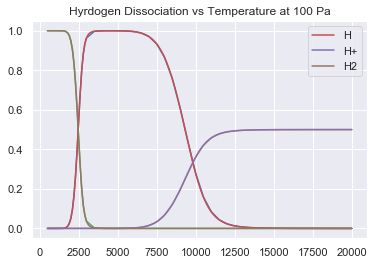

In [24]:
data_3 = pd.read_csv('data/H2data(0.001bar).csv')
temp3 = data_3['T, K'].tolist()
H3 = data_3['H'].tolist()
Hplus3 = data_3['H+'].tolist()
H23 = data_3['H2'].tolist()
sns.lineplot(temp3, H3)
sns.lineplot(temp3, Hplus3)
sns.lineplot(temp3, H23)
hydrogenDis(500, 20000, 100, 100)